In [1]:
import os, sys, shutil
from glob import glob
from copy import deepcopy
import numpy.lib.recfunctions as rf

import numpy as np
import matplotlib.pyplot as plt

import histlite as hl
import csky as cy
import warnings
warnings.filterwarnings("ignore")
dec_degs = np.r_[-70:70+1:10]

# Cut : Sigma > 20°

## BG trials

In [3]:
def ndarray_to_Chi2TSD(trials):
    return cy.dists.Chi2TSD(cy.utils.Arrays(trials))
bg_MCBG_20 = cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/',
        # filename pattern
        'trials__MCBG*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)
bg_scDec_20= cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/',
        # filename pattern
        'trials__ScrambleDecRa*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)
bg_scDecRa_20 = cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg',
        # filename pattern
        'trials__ScrambleDec_*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)

/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+000/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+010/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+020/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+030/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+040/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+050/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+060/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/+070/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut20/trials/bg/dec/-010/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/

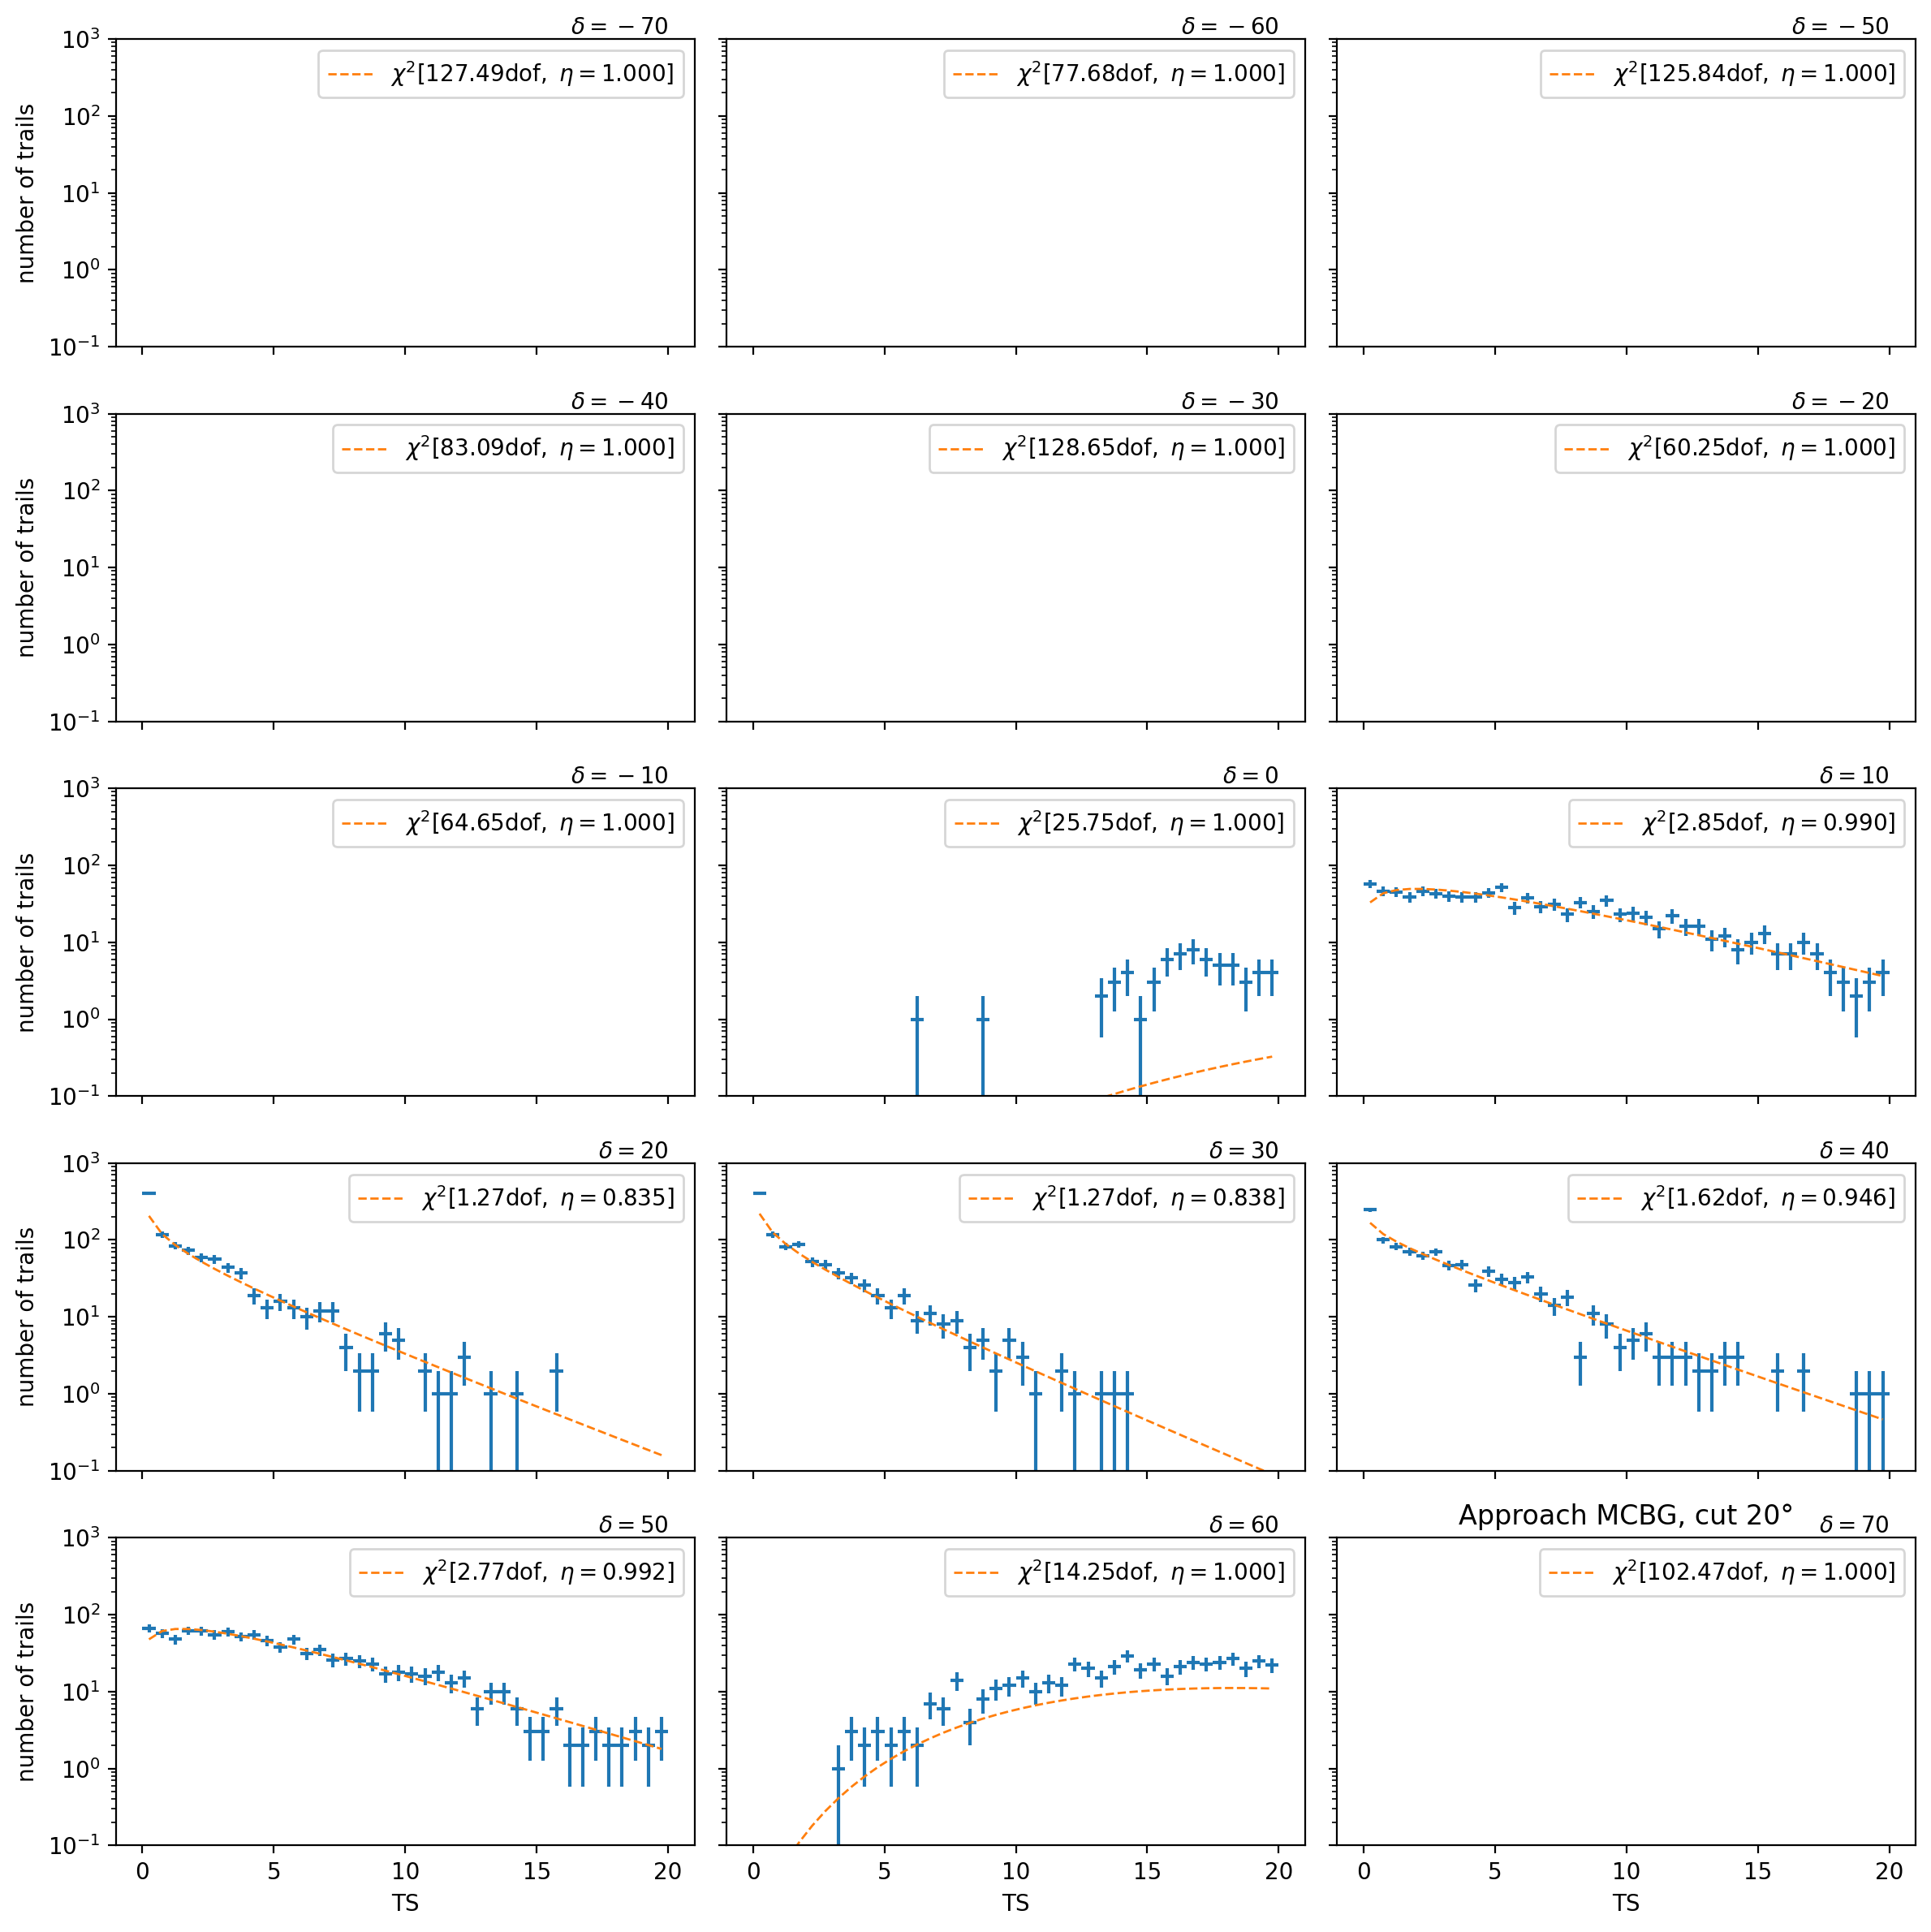

In [6]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_MCBG_20['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach MCBG, cut 20°")   
plt.tight_layout()
#plt.savefig("BG_MCBG_cut20.pdf")



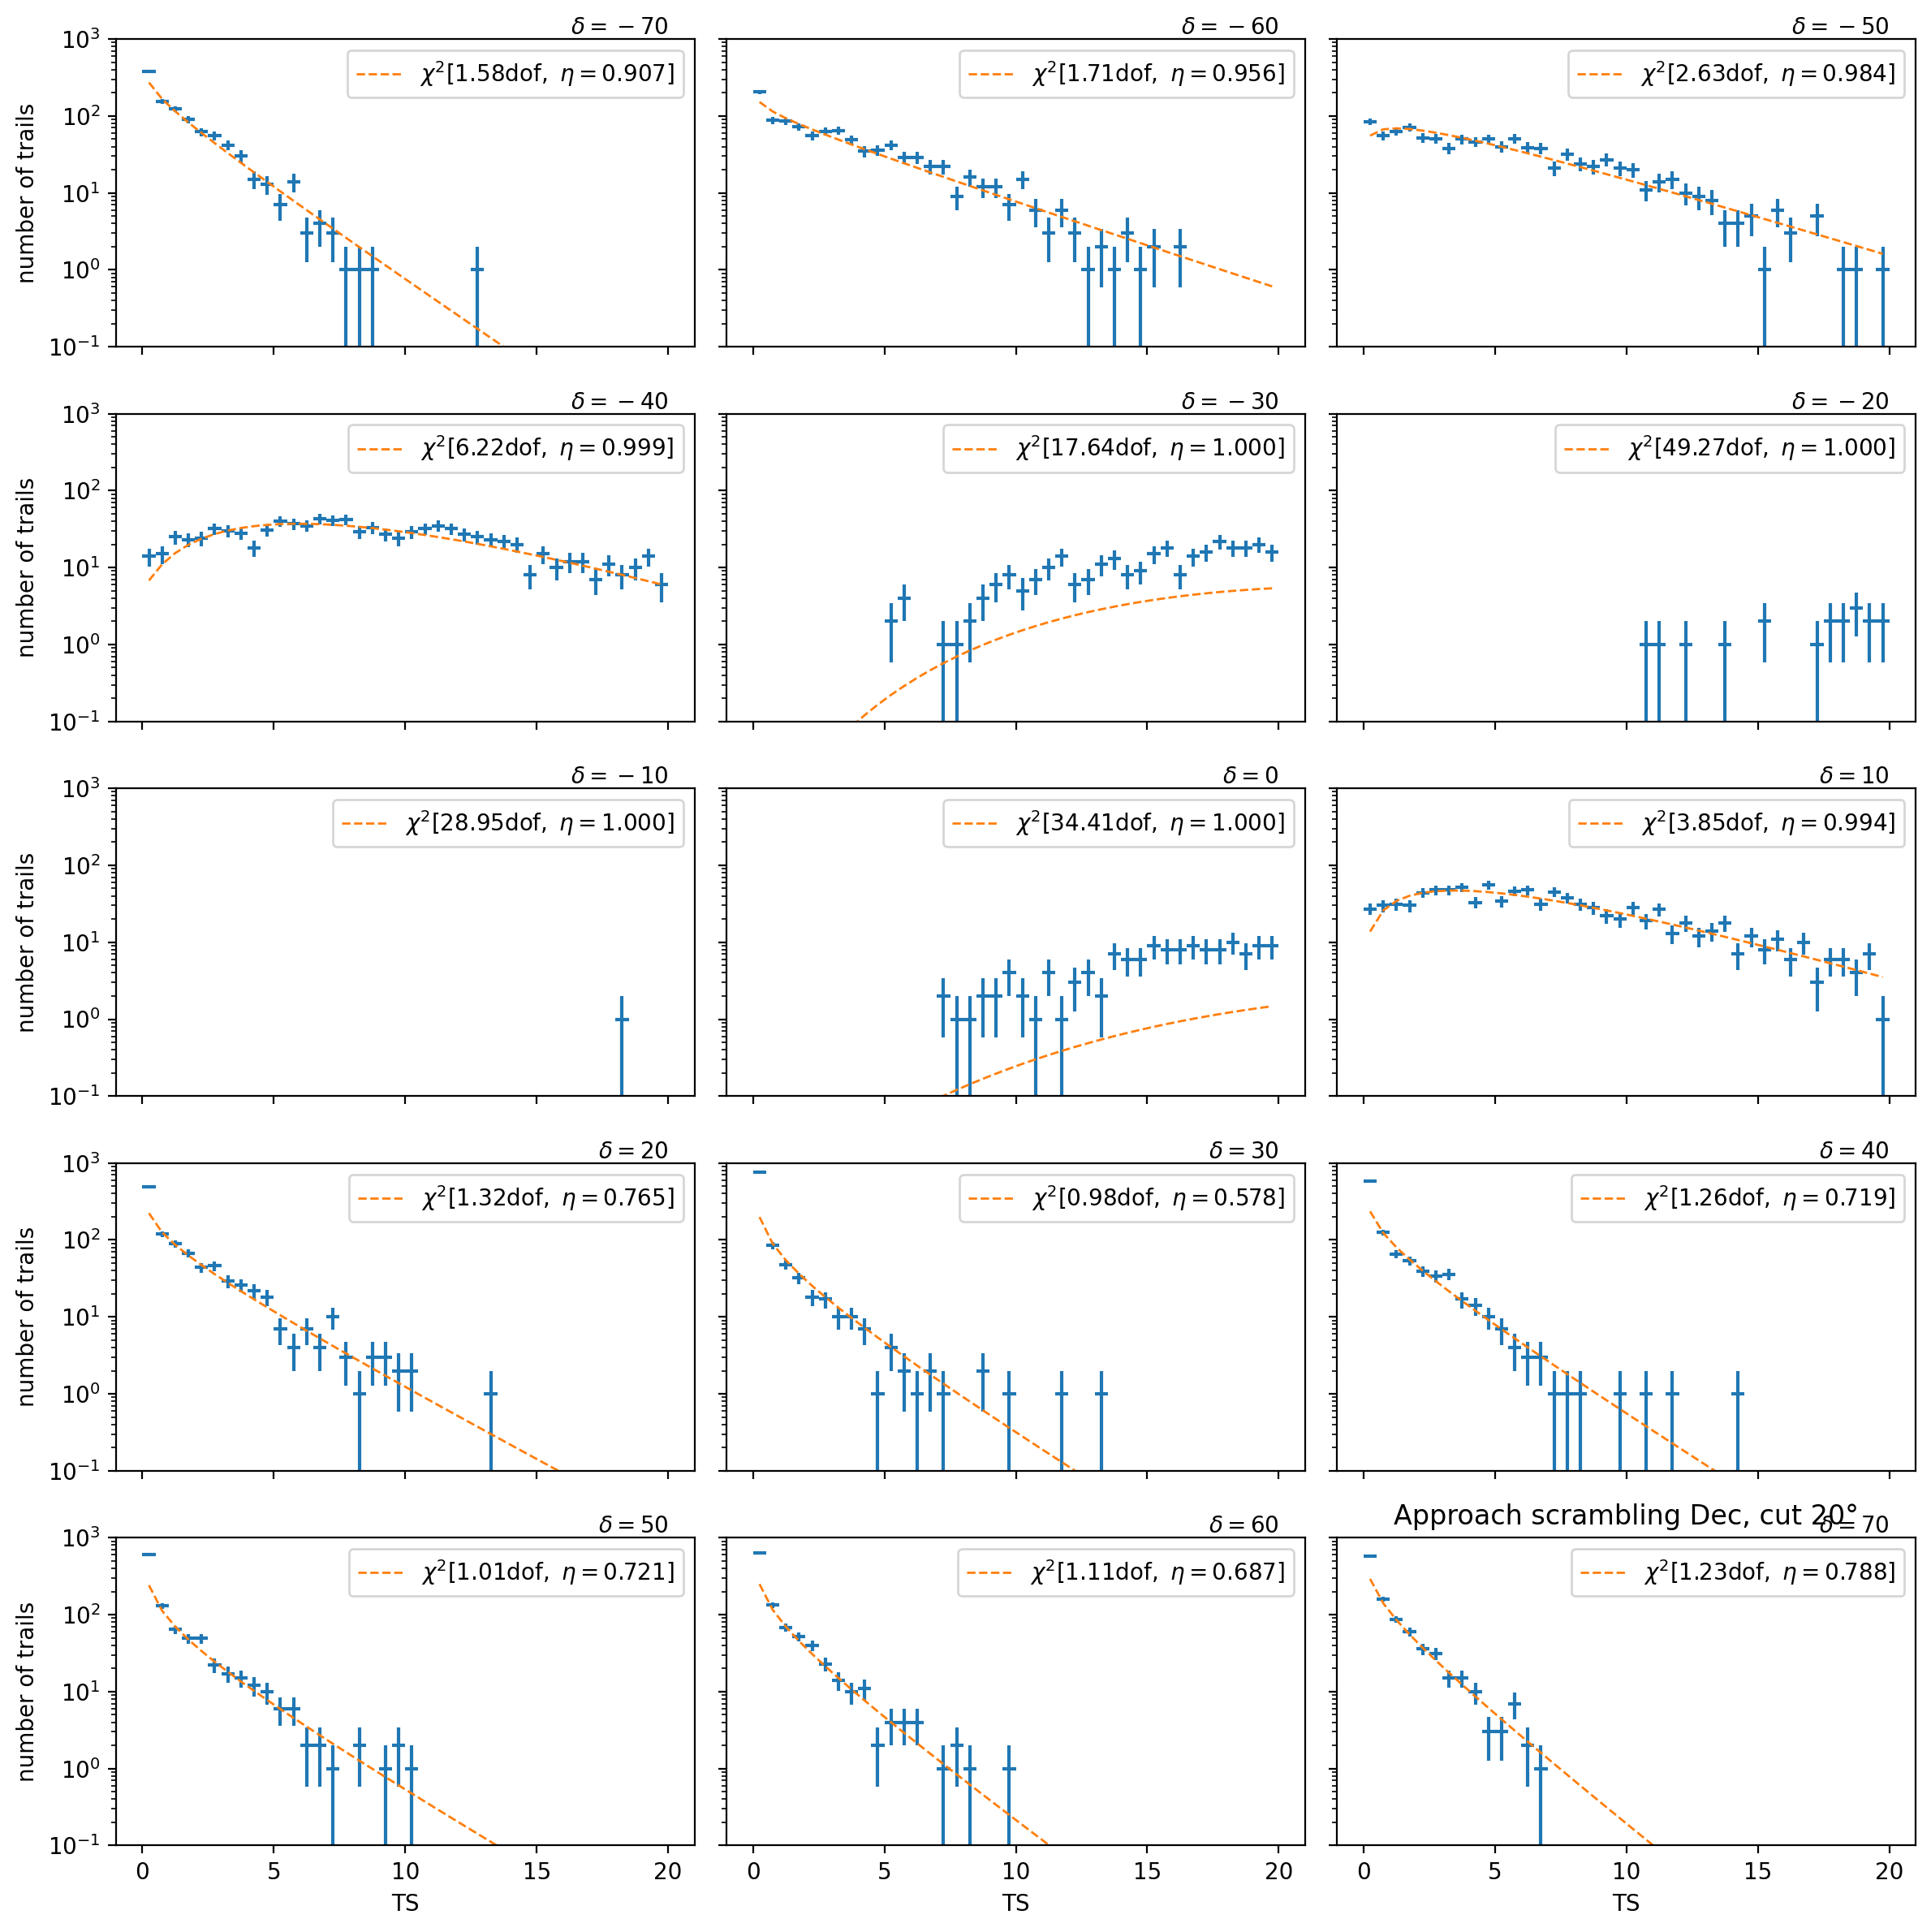

In [36]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_scDec_20['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach scrambling Dec, cut 20°")   
plt.tight_layout()
plt.savefig("BG_scDec_cut20.pdf")



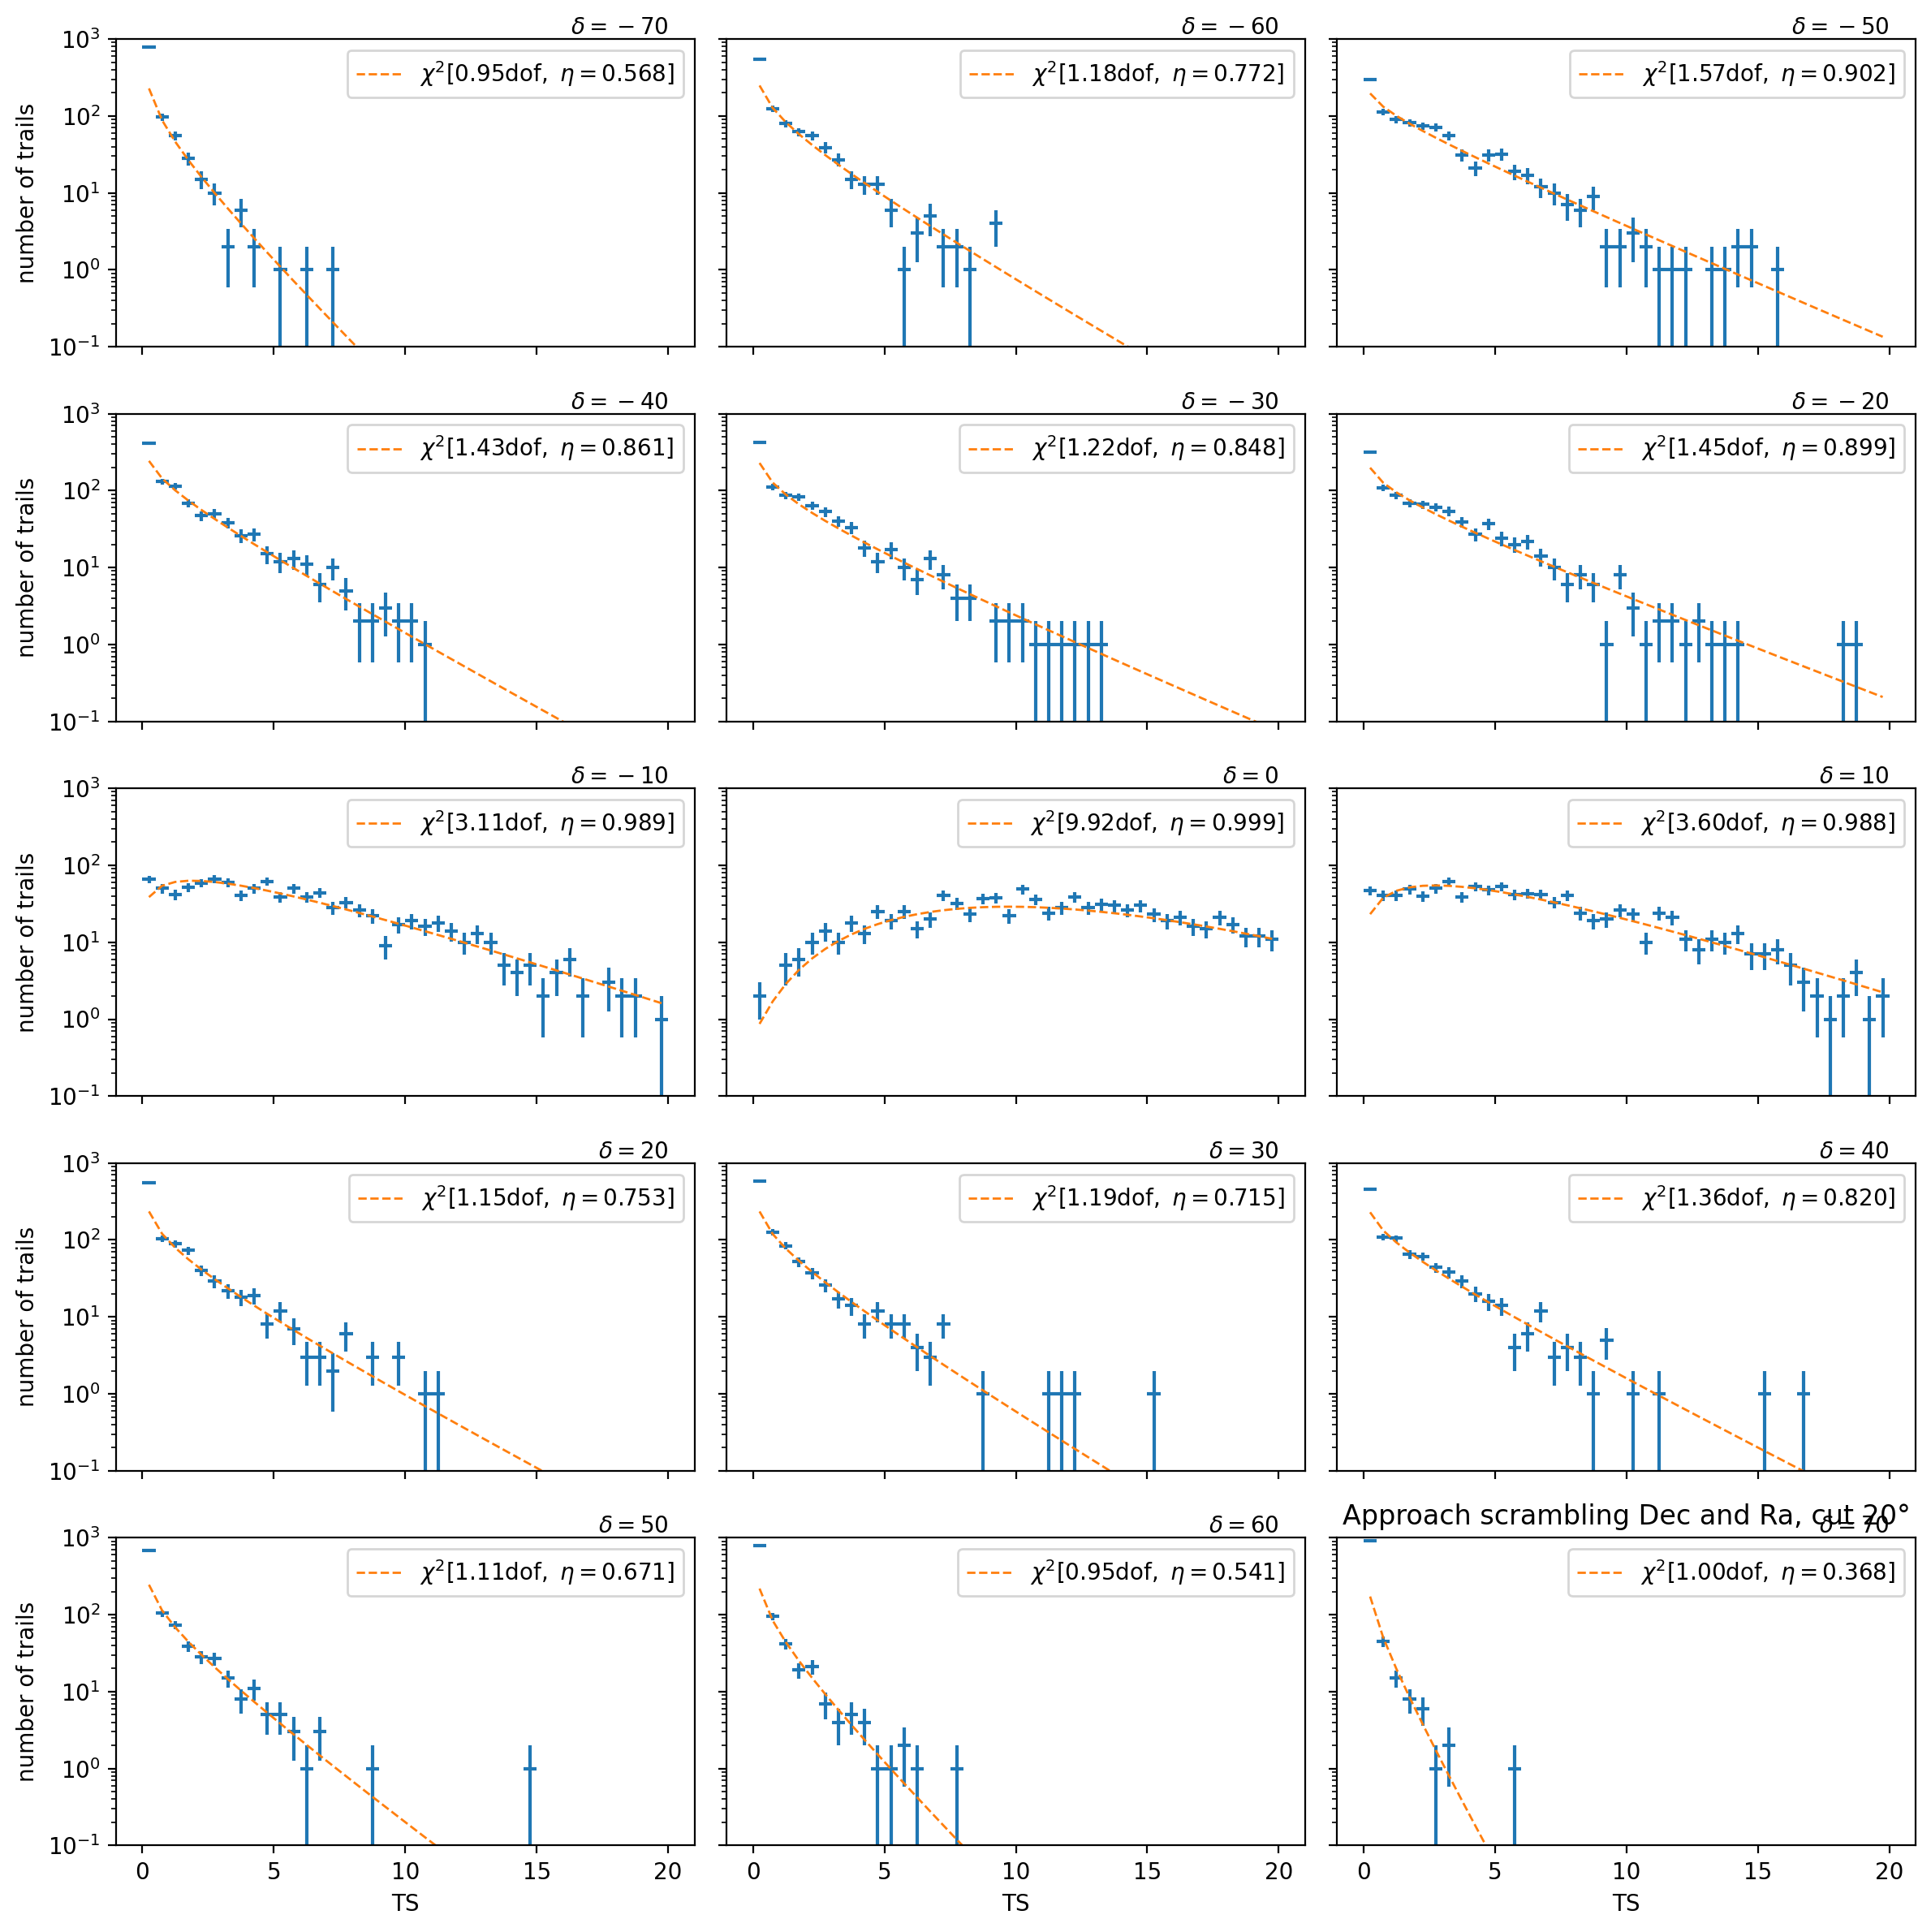

In [37]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_scDecRa_20['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach scrambling Dec and Ra, cut 20°")   
plt.tight_layout()
plt.savefig("BG_scDecRa_cut20.pdf")



In [20]:
class dummy: # class to calulate the median 
    _median = 0
    def __init__(self, median):
        self._median = median
    def median(self): return self._median

In [21]:
tr =cy.get_trial_runner(src=cy.sources(180, d, deg=True))
sens = tr.find_n_sig(bg_scDecRa_20.median(),
                                 0.9,
                                 n_sig_step=10,
                                 batch_size=100,
                                 tol=.10,
                                 flux = flux)

        
e2dnde = tr.to_E2dNdE(sens['n_sig'], E0=1, unit=1e3)
results[flux.gamma]['dec'].append(dec)
results[flux.gamma]['sensitivity'].append(e2dnde)

print(f'gamma: {flux.gamma}, sin(dec): {np.sin(np.deg2rad(dec))}')
print(f"----E2F Sensitivity: {e2dnde:4.2e} /TeV/cm2/s at 1 TeV")
print("----------------------------\n")

AttributeError: 'dict' object has no attribute 'median'

# Cut: Sigma > 10°

In [2]:
def ndarray_to_Chi2TSD(trials):
    return cy.dists.Chi2TSD(cy.utils.Arrays(trials))
bg_MCBG_10 = cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/',
        # filename pattern
        'trials__MCBG*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)
bg_scDec_10 = cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/',
        # filename pattern
        'trials__ScrambleDecRa*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)
bg_scDecRa_10 = cy.bk.get_all(
        # disk location
        '/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg',
        # filename pattern
        'trials__ScrambleDec_*npy',
        # how to combine items within each directory
        merge=np.concatenate,
        # what to do with items after merge
        post_convert=ndarray_to_Chi2TSD)

/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+000/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+010/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+020/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+030/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+040/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+050/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+060/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/+070/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/-010/trials__MCBG_N_001000_seed_0001.npy ...
/data/user/bschlueter/analysis/QUESO/

In [47]:
def getting_trial(approach, d):
    if approach == "ScrambleDec":
        ana = cy.get_analysis(cy.selections.repo,'ScrambleDec',cy.selections.QUESODataSpecs.QUESO, dir='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/')

        cy.CONF['ana']     = ana
        cy.CONF['mp_cpus'] = 5

        inj_conf = {}
        

    if approach == "MCBG":
        ana = cy.get_analysis(cy.selections.Repository(), 'MCBG', cy.selections.QUESODataSpecs.QUESO, dir ='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/', space_bg_kw={'bg_mc_weight':'atmo_weight'}, energy_kw ={'bg_mc_weight':'atmo_weight'}, load_sig = True)
        cy.CONF['ana'] = ana
        cy.CONF['mp_cpus'] = 5
        inj_conf =  {'bg_weight_names':['atmo_weight'],
                     'randomize'      :['ra', 'dec']}

    if approach == "ScrambleDecRa":
        ana = cy.get_analysis(cy.selections.repo, 'ScrambleDecRa', cy.selections.QUESODataSpecs.QUESO, dir='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/', space_bg_kw={'bg_mc_weight':'atmo_weight'}, energy_kw ={'bg_mc_weight':'atmo_weight'}, load_sig = True)
        cy.CONF['ana'] = ana
        cy.CONF['mp_cpus'] = 5
        
        inj_conf = {'randomize': ['ra', cy.inj.DecRandomizer],
                    'sindec_bandwidth': np.radians(5),
                    'dec_rand_method': 'gaussian_fixed',
                    'dec_rand_kwargs': dict(randomization_width=np.radians(3)),
                    'dec_rand_pole_exlusion': np.radians(8)}

        
    tr = cy.get_trial_runner(src=cy.sources(180, d, deg=True),inj_conf = inj_conf)

    return tr

def getting_BG(approach,d):
    def ndarray_to_Chi2TSD(trials):
        return cy.dists.Chi2TSD(cy.utils.Arrays(trials))

    if d >0:
        dec = '+0'+str(d)
    elif d == 0:
        dec = '+000'
    elif d<0:
        dec = '-0'+str(abs(d))
        
    if approach == "ScrambleDec":
        bg = cy.bk.get_all('/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/'+str(dec),'trials__ScrambleDec_*npy',merge=np.concatenate,post_convert=ndarray_to_Chi2TSD)

    if approach == "MCBG":
        #print(dec)
        bg = cy.bk.get_all('/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/'+str(dec),'trials__MCBG*npy',merge=np.concatenate, post_convert=ndarray_to_Chi2TSD)

    if approach == "ScrambleDecRa":
        bg = cy.bk.get_all('/data/user/bschlueter/analysis/QUESO/sigmacut10/trials/bg/dec/'+str(dec),'trials__ScrambleDecRa*npy',merge=np.concatenate,post_convert=ndarray_to_Chi2TSD)
        
    return bg

def get_sens(d,tr,bg,gamma):
    flux = cy.hyp.PowerLawFlux(gamma=gamma)
    sens = tr.find_n_sig(bg.median(),0.9,n_sig_step=10,batch_size=100,tol=.10,flux = flux)
    e2dnde = tr.to_E2dNdE(sens['n_sig'], E0=1, unit=1e3)

        
    return e2dnde


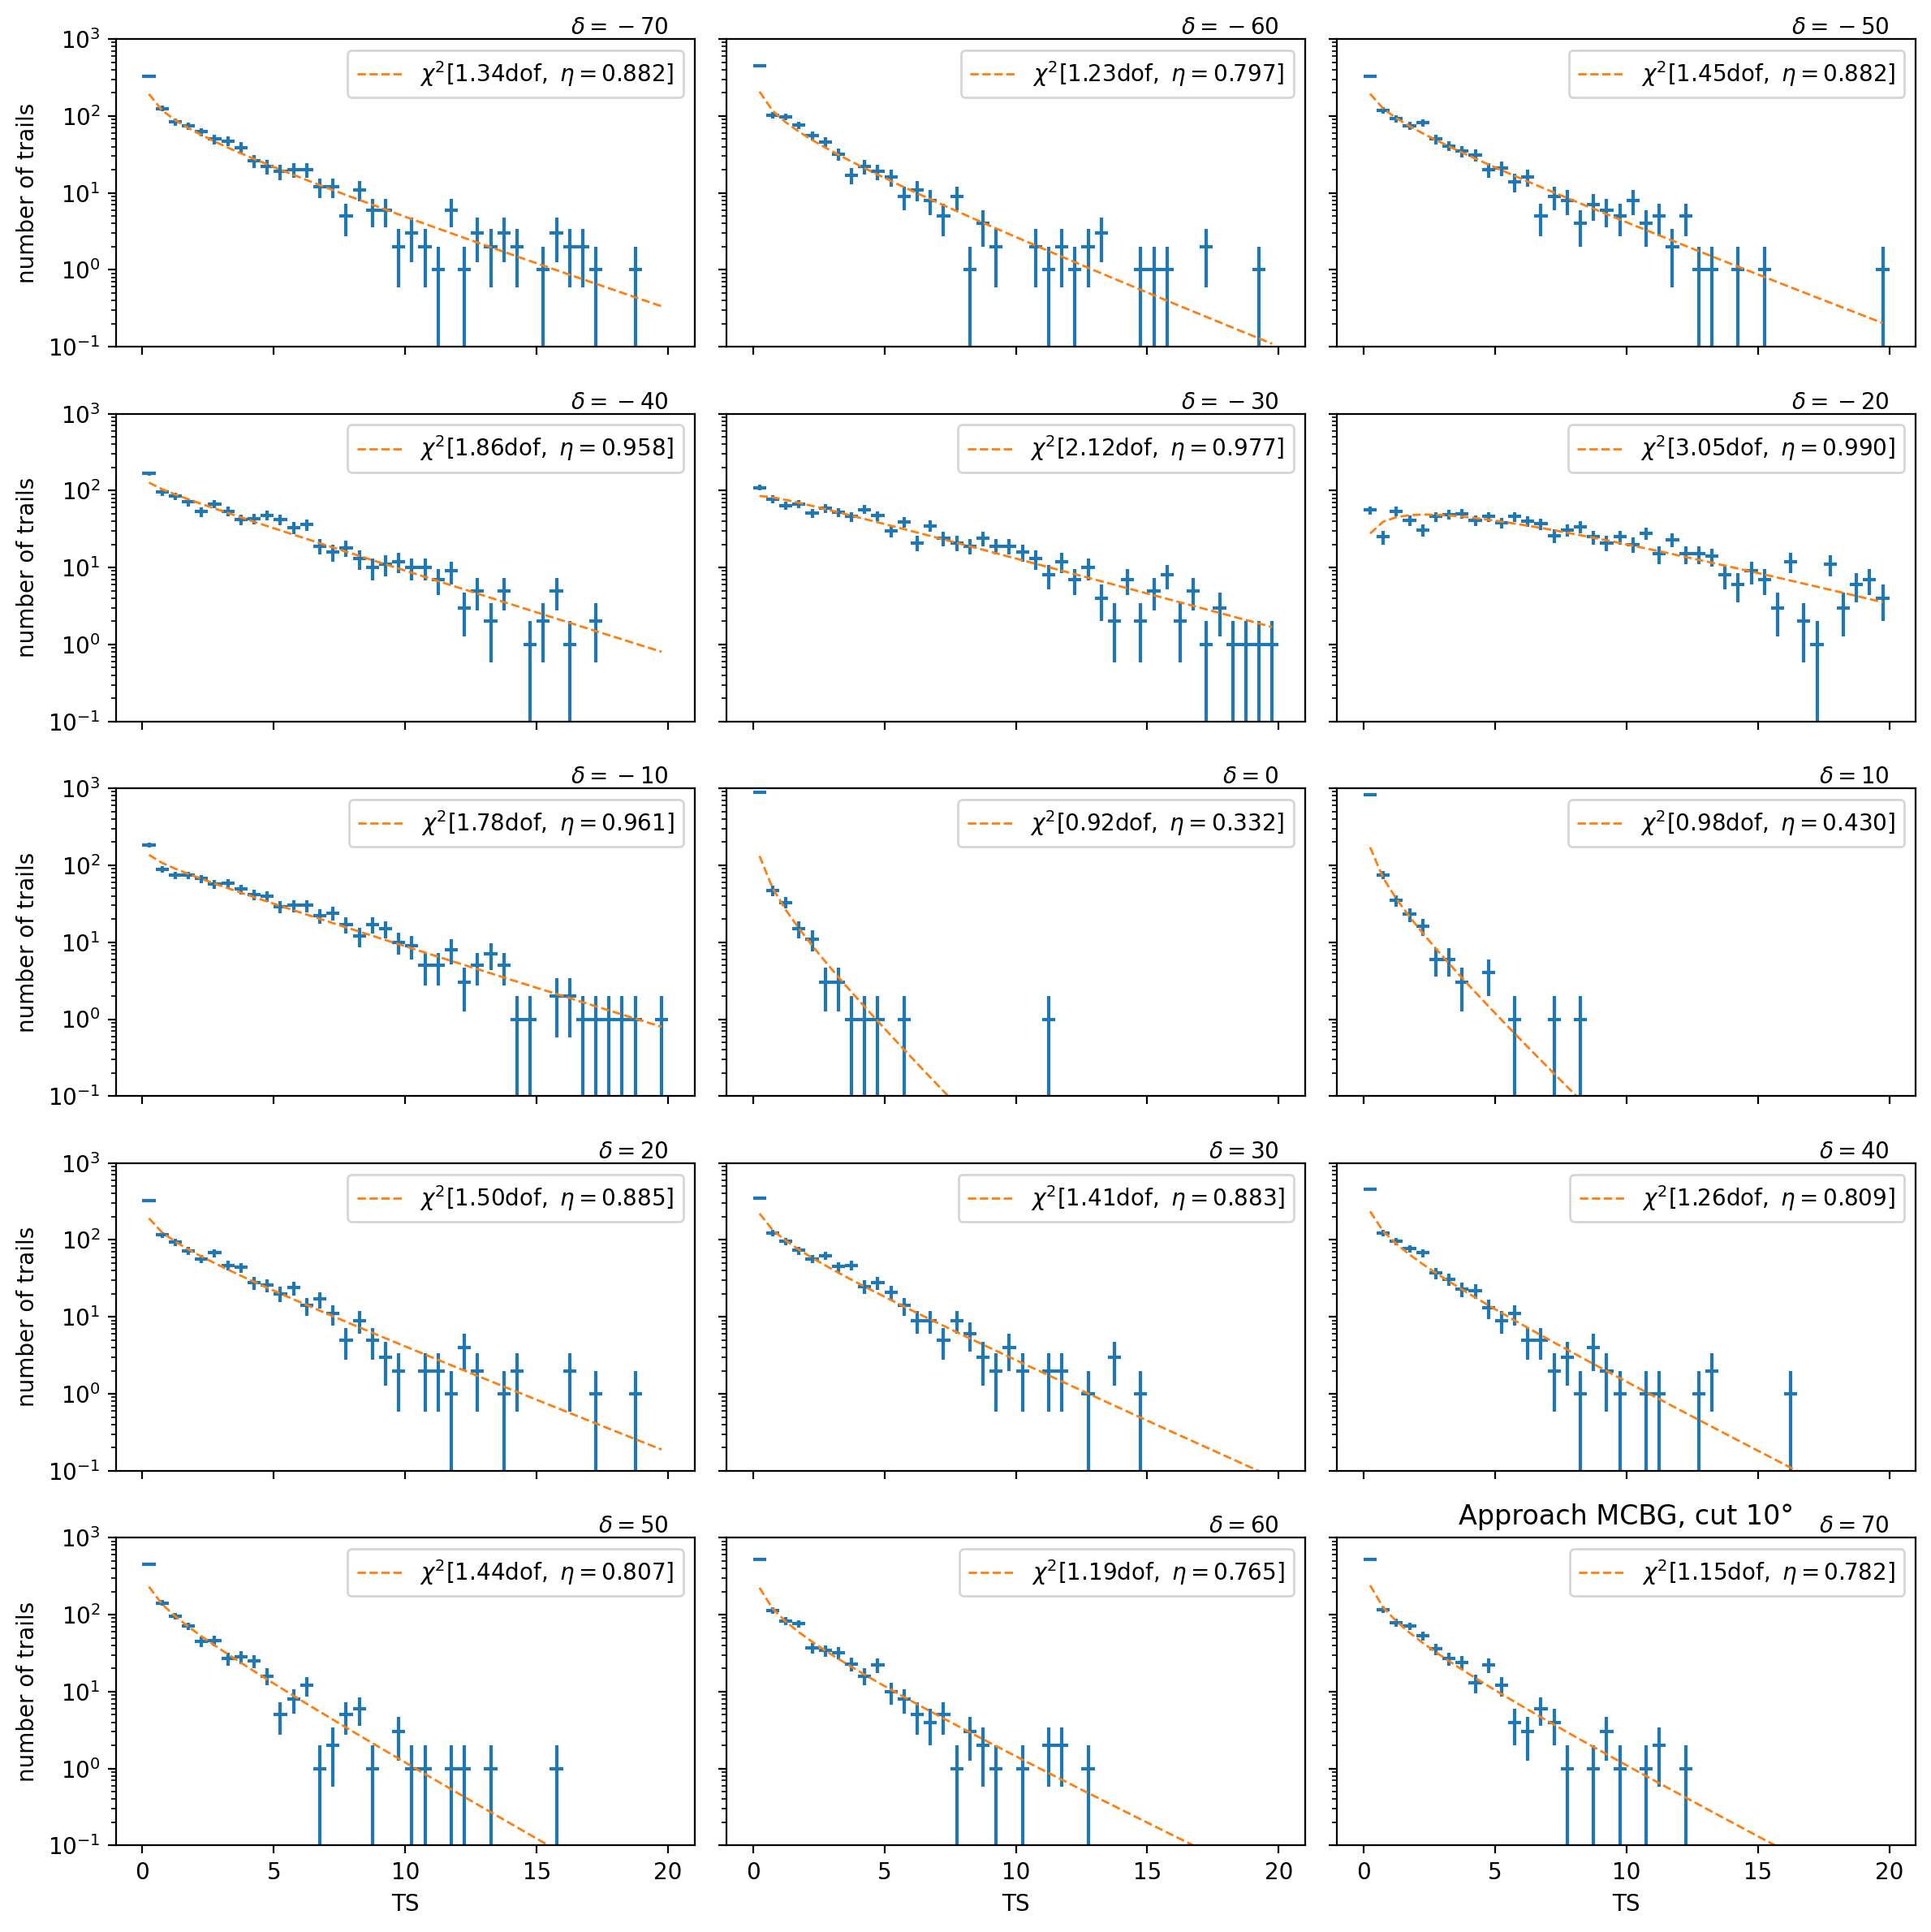

In [4]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_MCBG_10['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach MCBG, cut 10°")   

plt.tight_layout()
plt.savefig("BG_MCBG_cut10.pdf")



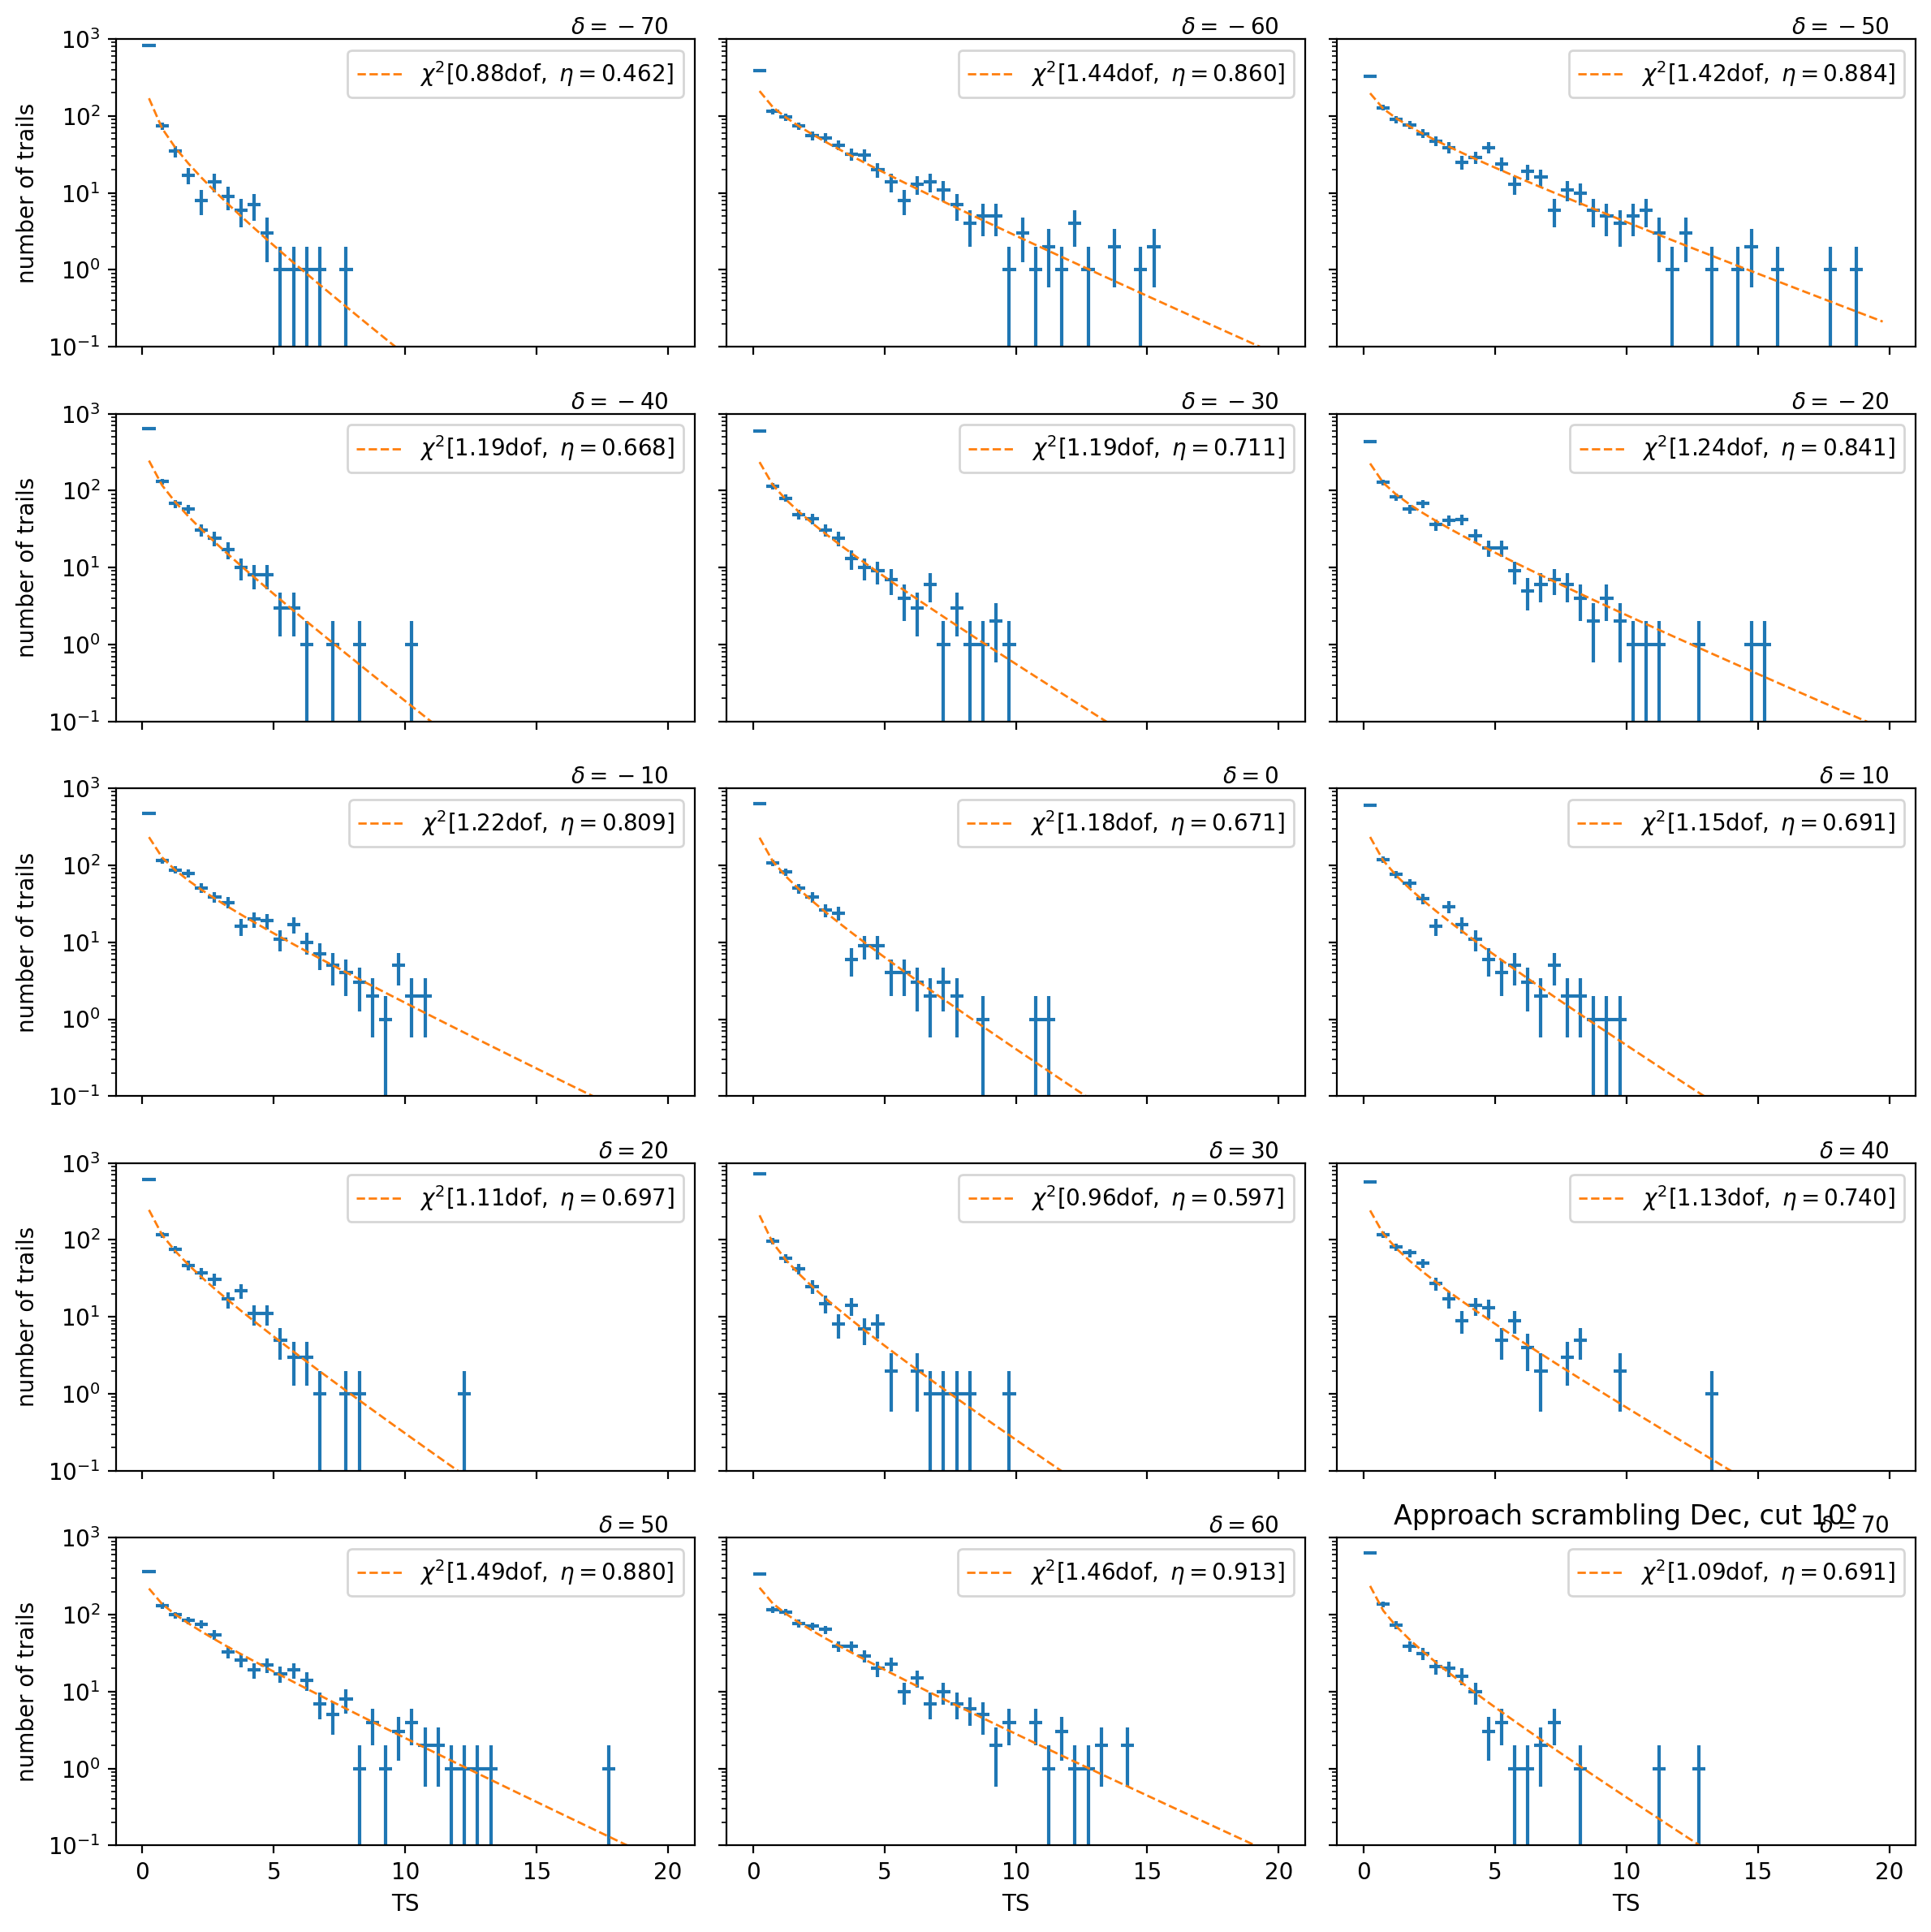

In [5]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_scDec_10['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach scrambling Dec, cut 10°")   
plt.tight_layout()
plt.savefig("BG_scDec_cut10.pdf")



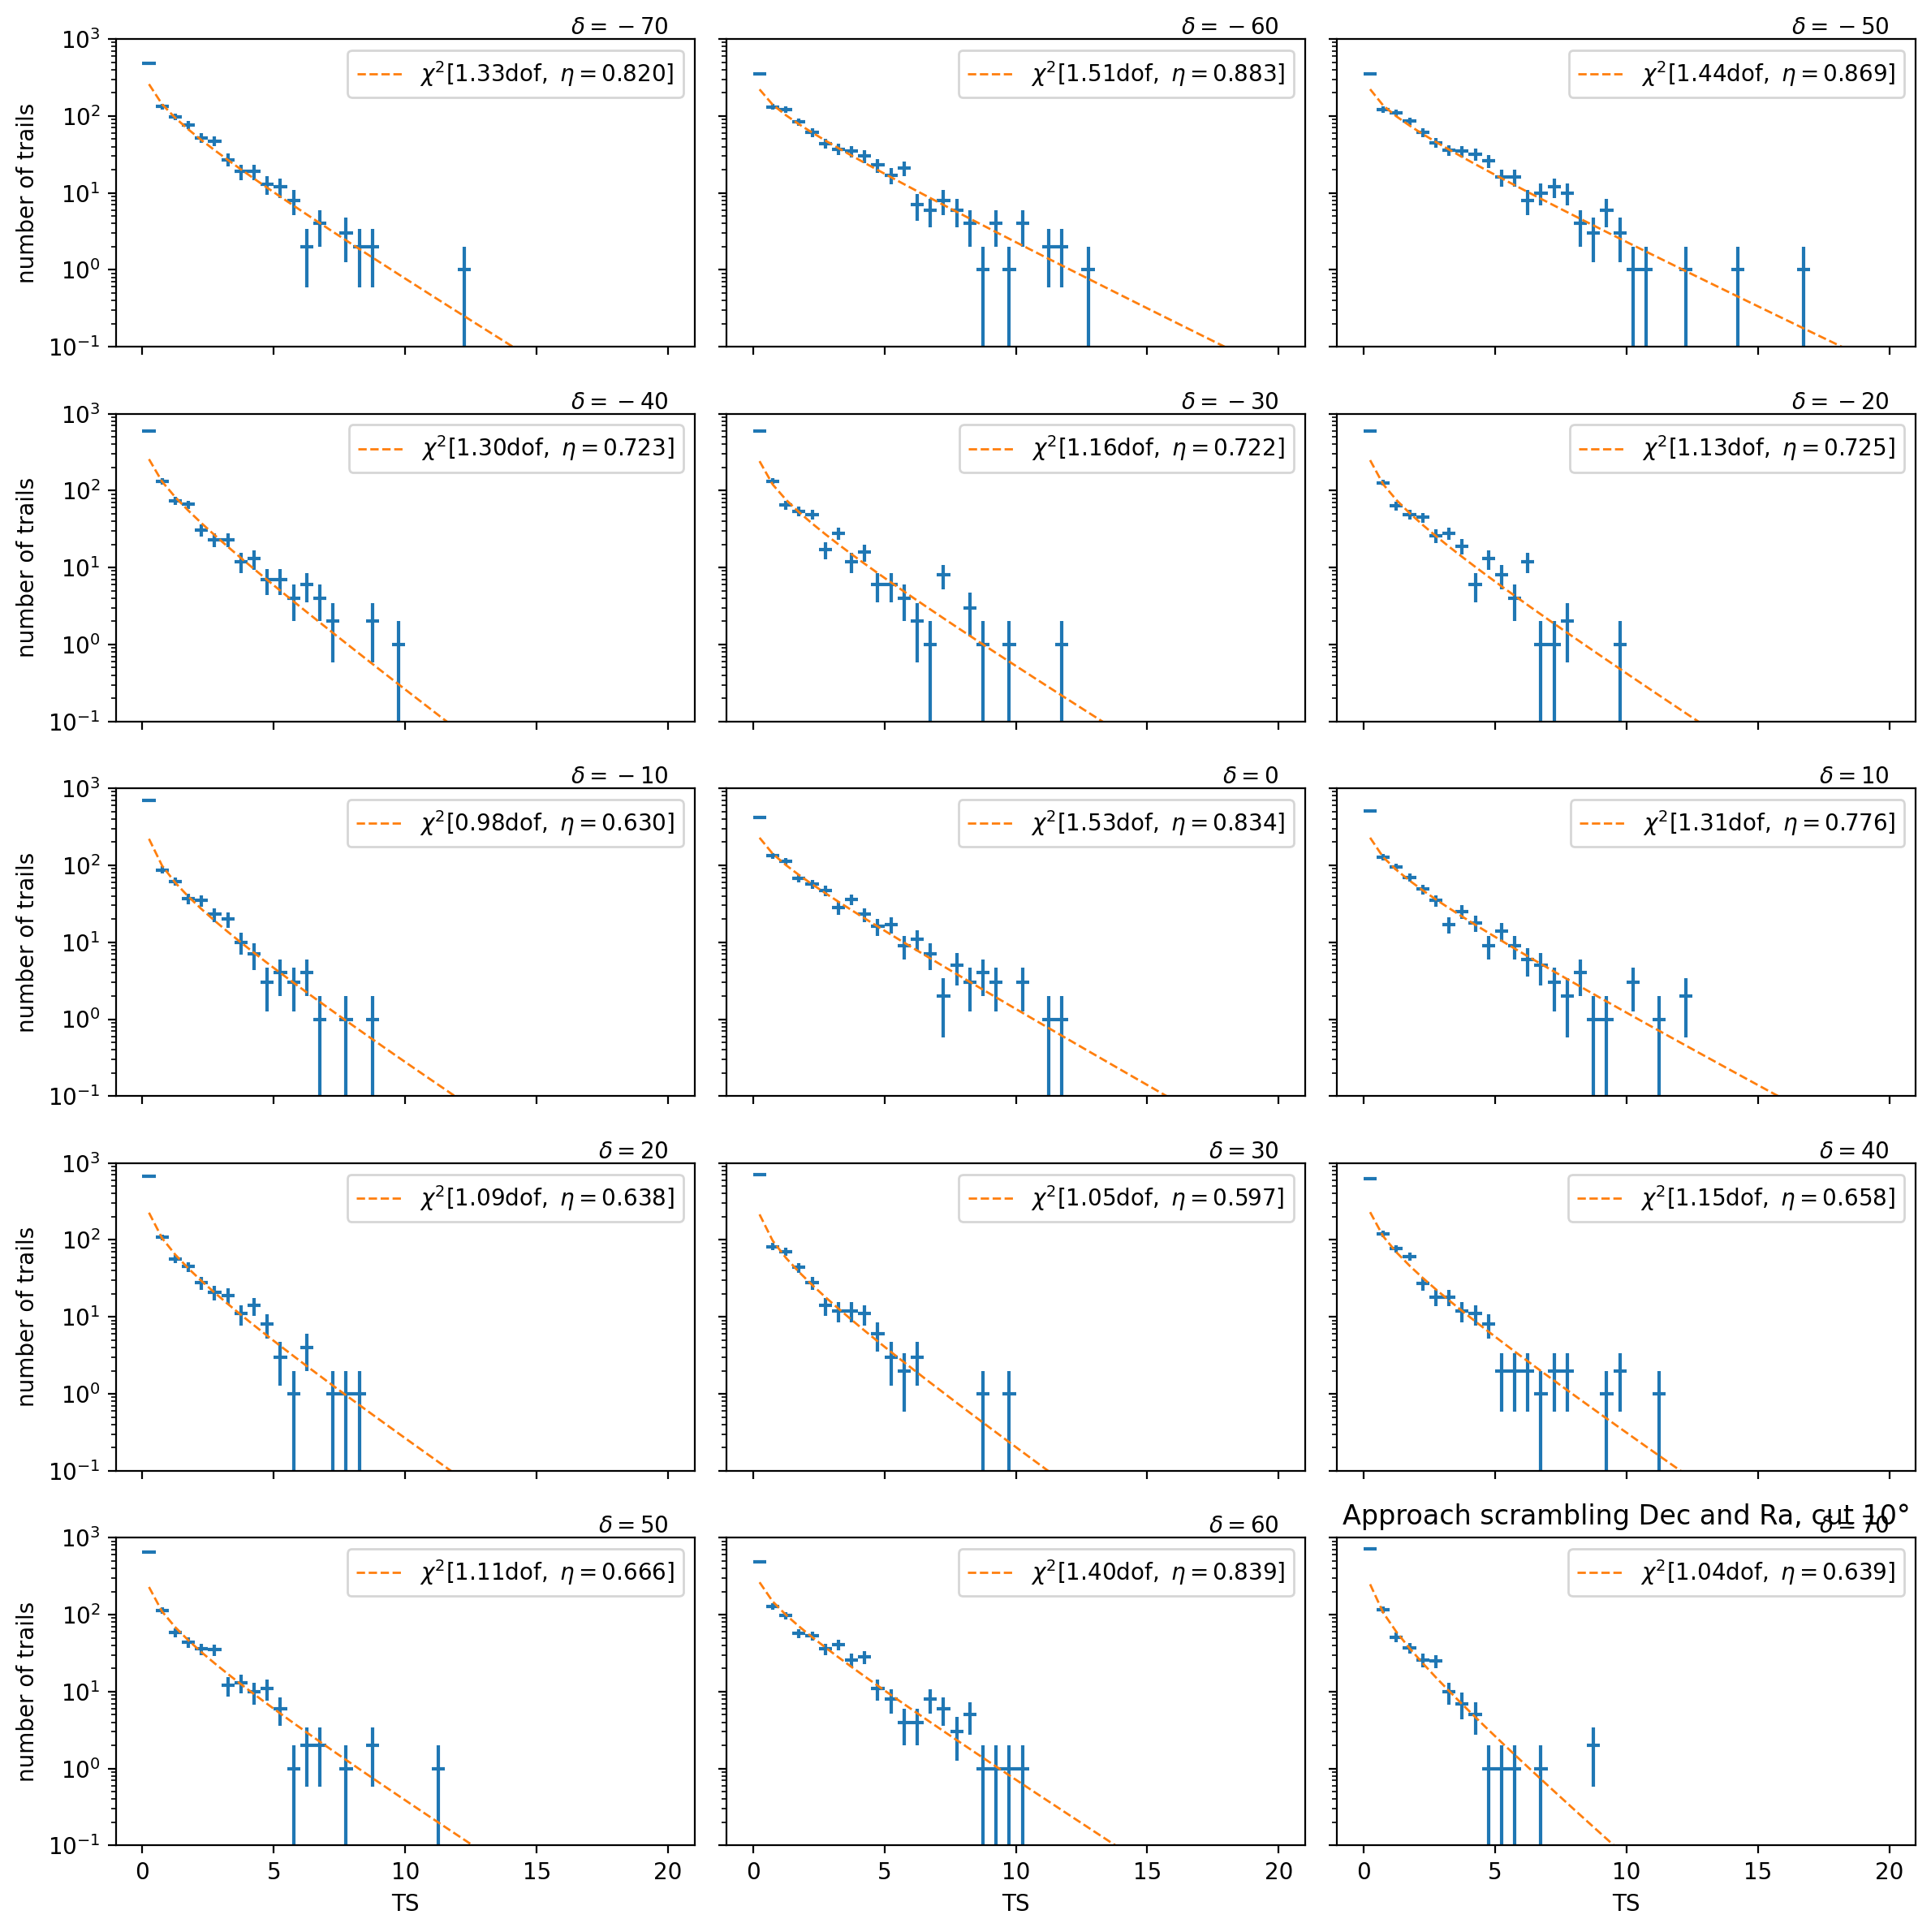

In [6]:
nrow, ncol = 5, 3
fig, aaxs = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True, sharey=True, dpi=200)
axs = np.ravel(aaxs)
# keep track of which ax's we already used
used_axs = []
for (i, dec_deg) in enumerate(dec_degs):
    ax = axs[i]
    # plot histogram
    b = bg_scDecRa_10['dec'][dec_deg]
    h = b.get_hist(bins=40,range=(0,20))
    hl.plot1d(ax, h, crosses=True)
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=1, ls='--',label=r'$\chi^2[{:.2f}\mathrm{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_ylim(1e-1, 1e3)
    ax.text(20, 1e3, r'$\delta={:.0f}$'.format(dec_deg), ha='right', va='bottom')
    used_axs.append(ax)
    ax.legend()
# hide unused ax's
for ax in axs:
    if ax not in used_axs:
        ax.set_visible(True)
# add x and y labels
for ax in aaxs[-1]:
    if ax in used_axs:
        ax.set_xlabel(r'TS')
for ax in aaxs[:,0]:
    ax.set_ylabel(r'number of trails')
    
plt.title("Approach scrambling Dec and Ra, cut 10°")   
plt.tight_layout()

plt.savefig("BG_scDecRa_cut10.pdf")


In [18]:
sens_ScrambleDec = []
for d in dec_degs:
        tr = getting_trial("ScrambleDec",d)
        bg = getting_BG("ScrambleDec",d)
        sens_ScrambleDec.append(get_sens(d,tr,bg,3))


Setting up Analysis for:
QUESO
Setting up QUESO...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.0070

UnboundLocalError: local variable 'info' referenced before assignment

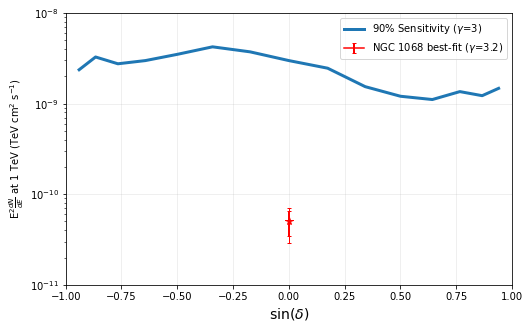

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
gamma=3
ax.plot(np.sin(np.deg2rad(dec_degs)), 
             sens_ScrambleDec,
             linewidth=3,
             linestyle='solid',
             color="C0",
             label=r'90% Sensitivity ($\gamma$={})'.format(gamma))
    
# Draw NGC1068's best-fit
ax.plot(0, 5e-11, color='r', marker='*', markersize=8)
ax.errorbar(0, 5e-11, yerr=2.1e-11, color='r', elinewidth=1, capsize=2)
ax.errorbar(0, 5e-11, yerr=1.5e-11, color='r', elinewidth=2, capsize=2,
            label=r'NGC 1068 best-fit ($\gamma$=3.2)')

ax.legend()
ax.grid(alpha=0.25)
ax.set_ylim(1e-11, 1e-8)
ax.set_xlim(-1, 1)
ax.set_yscale('log')
ax.set_xlabel(r"sin($\delta$)", fontsize=14)
ax.set_ylabel(r"E$^2 \frac{dN}{dE}$ at 1 TeV (TeV cm$^2$ s$^{-1}$)")
plt.savefig("Sens_cut10_scDec.pdf")

In [19]:
sens_ScrambleDecRa = []
for d in dec_degs:
        tr = getting_trial("ScrambleDecRa",d)
        bg = getting_BG("ScrambleDecRa",d)
        sens_ScrambleDecRa.append(get_sens(d,tr,bg,3))


Setting up Analysis for:
QUESO
Setting up QUESO...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.0070

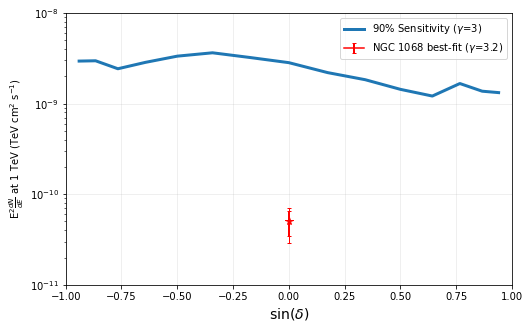

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
gamma=3
ax.plot(np.sin(np.deg2rad(dec_degs)), 
             sens_ScrambleDecRa,
             linewidth=3,
             linestyle='solid',
             color="C0",
             label=r'90% Sensitivity ($\gamma$={})'.format(gamma))
    
# Draw NGC1068's best-fit
ax.plot(0, 5e-11, color='r', marker='*', markersize=8)
ax.errorbar(0, 5e-11, yerr=2.1e-11, color='r', elinewidth=1, capsize=2)
ax.errorbar(0, 5e-11, yerr=1.5e-11, color='r', elinewidth=2, capsize=2,
            label=r'NGC 1068 best-fit ($\gamma$=3.2)')

ax.legend()
ax.grid(alpha=0.25)
ax.set_ylim(1e-11, 1e-8)
ax.set_xlim(-1, 1)
ax.set_yscale('log')
ax.set_xlabel(r"sin($\delta$)", fontsize=14)
ax.set_ylabel(r"E$^2 \frac{dN}{dE}$ at 1 TeV (TeV cm$^2$ s$^{-1}$)")
plt.savefig("Sens_cut10_scDecRa.pdf")

In [21]:
sens_MCBG = []
for d in dec_degs: 
        tr = getting_trial("MCBG",d)
        bg = getting_BG("MCBG",d)
        sens_MCBG.append(get_sens(d,tr,bg,3))

Setting up Analysis for:
QUESO
Setting up QUESO...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_MC_all_combined_with_muongun_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/Queso_Fakedata_3Years_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_fake_GRL_2.npy ...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20

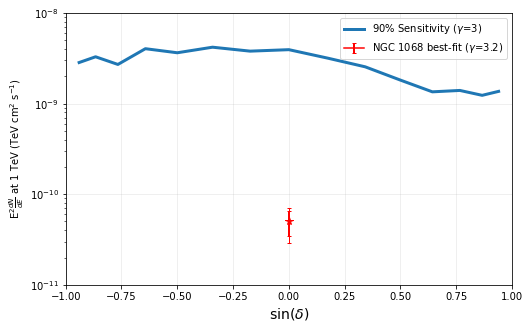

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
gamma=3
ax.plot(np.sin(np.deg2rad(dec_degs)), 
             sens_MCBG,
             linewidth=3,
             linestyle='solid',
             color="C0",
             label=r'90% Sensitivity ($\gamma$={})'.format(gamma))
    
# Draw NGC1068's best-fit
ax.plot(0, 5e-11, color='r', marker='*', markersize=8)
ax.errorbar(0, 5e-11, yerr=2.1e-11, color='r', elinewidth=1, capsize=2)
ax.errorbar(0, 5e-11, yerr=1.5e-11, color='r', elinewidth=2, capsize=2,
            label=r'NGC 1068 best-fit ($\gamma$=3.2)')

ax.legend()
ax.grid(alpha=0.25)
ax.set_ylim(1e-11, 1e-8)
ax.set_xlim(-1, 1)
ax.set_yscale('log')
ax.set_xlabel(r"sin($\delta$)", fontsize=14)
ax.set_ylabel(r"E$^2 \frac{dN}{dE}$ at 1 TeV (TeV cm$^2$ s$^{-1}$)")
plt.savefig("Sens_cut10_MCBG.pdf")

# Scramble Ra approach

In [37]:
ana = cy.get_analysis(cy.selections.repo,'ScrambleDec',cy.selections.QUESODataSpecs.QUESO, dir='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/')
a = ana[-1]
data, sig = a.data, a.sig

Setting up Analysis for:
QUESO
Setting up QUESO...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.0070

In [39]:
dir(a.bg_space_param)

['__add__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compute_norm',
 'dOmega_corr',
 'h',
 'h_counts',
 'hkw',
 'keep',
 'range',
 's',
 's_hl',
 'skw']

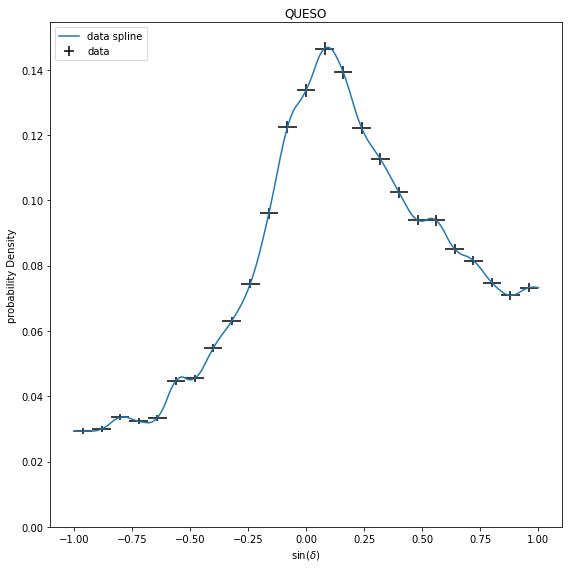

In [25]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = plt.gca()

hl.plot1d (ax, a.bg_space_param.h, crosses=True, color='k', label='data')

sd = np.linspace (-1, 1, 500)
plt.plot (sd, a.bg_space_param(sindec=sd), label='data spline')

plt.ylim(0)
plt.title('QUESO')
plt.xlabel(r'$\sin(\delta)$')
plt.ylabel(r'probability Density')
plt.legend(loc='upper left')
plt.tight_layout()

In [26]:
gamma = [2.,2.5,3.]

<Figure size 432x288 with 0 Axes>

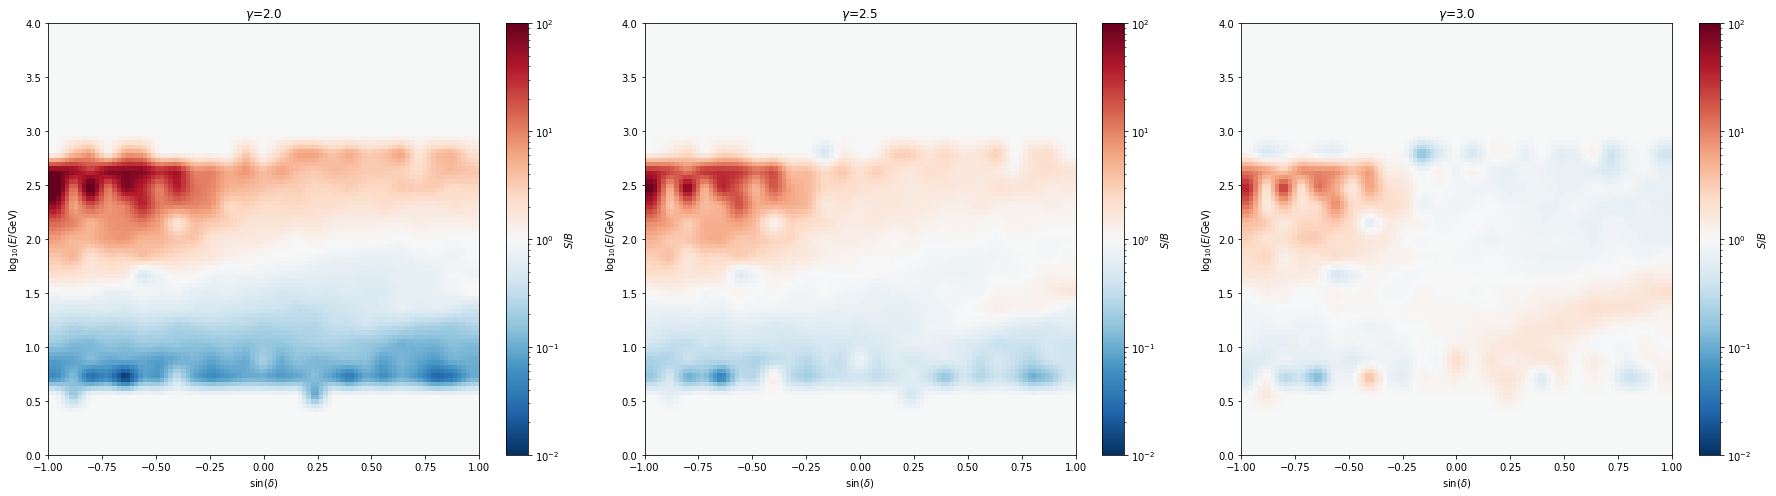

In [27]:
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(25,7))
axs = np.ravel(axs)
for (i, g) in enumerate(gamma):
    ax = axs[i]
    #use data pdf
    eprm = a.energy_pdf_ratio_model
    ss = dict(zip(eprm.gammas, eprm.ss_hl))
    things = hl.plot2d(ax, ss[g].eval(bins=100),
                       vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
    ax.set_title(r'$\gamma$={:.1f}'.format(g))
    things['colorbar'].set_label(r'$S/B$')
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'$\log_{10}(E/\mathrm{GeV})$')
    
plt.tight_layout()

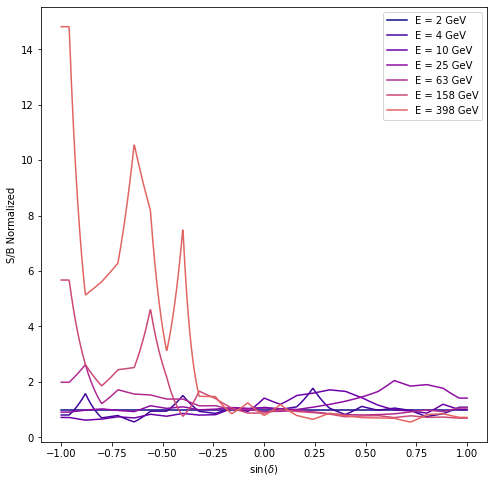

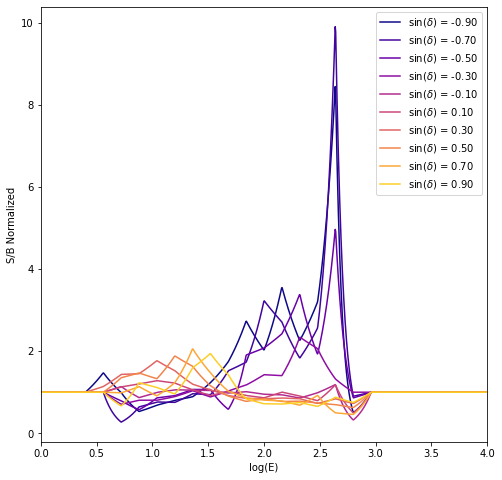

In [29]:
eprm = a.energy_pdf_ratio_model
ss = dict(zip(eprm.gammas, eprm.ss_hl))
x = ss[g].eval(bins = (1000,10))

lines = x.T
z_bins, e_bins = x.bins


z_mids = (z_bins[1:] + z_bins[:-1])/2.
e_mids = (e_bins[1:] + e_bins[:-1])/2.

fig = plt.gcf()
fig.set_size_inches(8,8)
for n, e in enumerate(e_mids[:-3]):
    plt.plot(z_mids, lines.values[n],
             color = plt.cm.plasma(n/10.),
             label = 'E = {:.0f} GeV'.format(10**e))
    
plt.legend()
plt.xlabel(r'sin($\delta$)')
plt.ylabel('S/B Normalized')

plt.show()


eprm = a.energy_pdf_ratio_model
ss = dict(zip(eprm.gammas, eprm.ss_hl))
x = ss[g].eval(bins = (10,1000))


z_bins, e_bins = x.bins


z_mids = (z_bins[1:] + z_bins[:-1])/2.
e_mids = (e_bins[1:] + e_bins[:-1])/2.

fig = plt.gcf()
fig.set_size_inches(8,8)
for n, z in enumerate(z_mids):
    plt.plot(e_mids, x.values[n],
             color = plt.cm.plasma(n/10.),
             label = r'sin($\delta$)'+' = {:.2f}'.format(z))
    
plt.legend()
plt.xlabel(r'log(E)')
plt.ylabel('S/B Normalized')
plt.xlim([0,4])

plt.show()


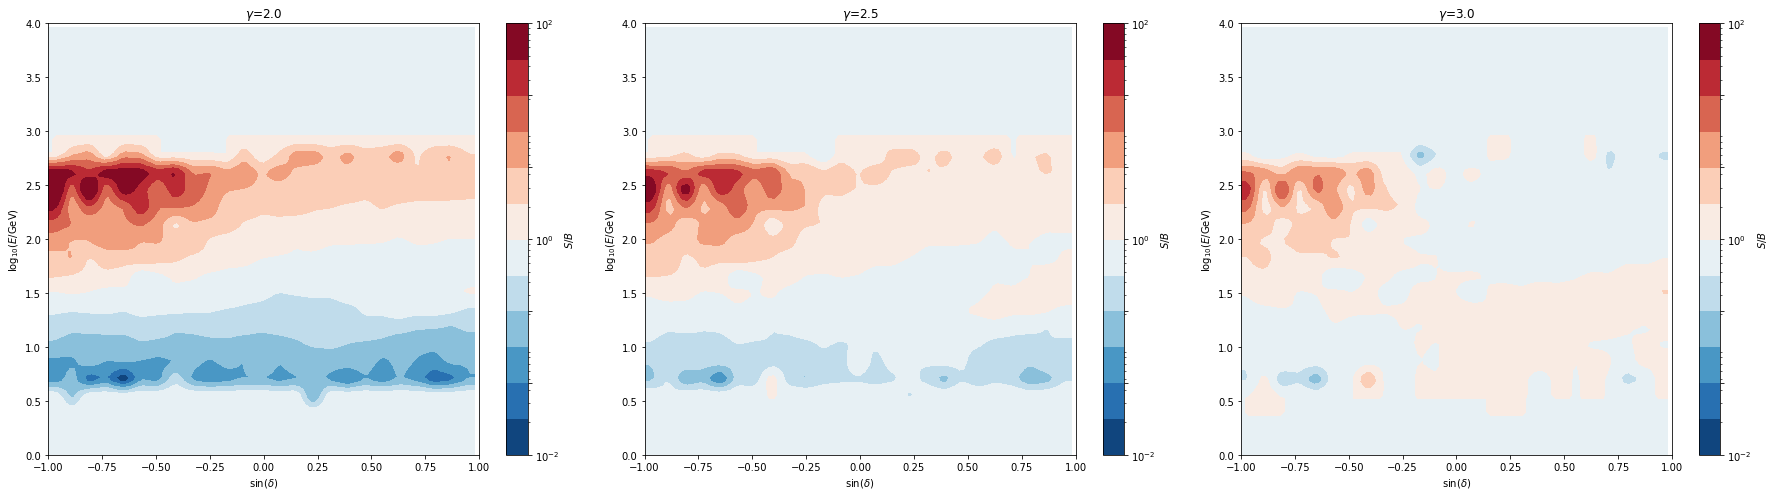

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(25,7))
axs = np.ravel(axs)
for (i, g) in enumerate(gamma):
    ax = axs[i]
    eprm = a.energy_pdf_ratio_model
    ss = dict(zip(eprm.gammas, eprm.ss_hl))
    things = hl.plot2d(ax, ss[g].eval(bins=100),
                       levels=np.logspace(-2, 2, 12+1),
                       vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
    ax.set_title(r'$\gamma$={:.1f}'.format(g))
    things['colorbar'].set_label(r'$S/B$')
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'$\log_{10}(E/\mathrm{GeV})$')
    
plt.tight_layout()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.12039068e-04
  1.67366191e-03 9.66526136e-03 4.45375322e-02 8.78431832e-02
  1.10515864e-01 1.11807272e-01 1.07374431e-01 1.23874573e-01
  1.30833210e-01 1.32800120e-01 8.65345673e-02 4.81318799e-02
  4.29640375e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.42881282e-05
  5.78142591e-04 6.77334042e-03 3.57564807e-02 9.14445817e-02
  1.12300312e-01 1.14397862e-01 1.24251377e-01 1.27754006e-01
  1.27168753e-01 1.12412037e-01 1.01237296e-01 4.22626849e-02
  3.63883889e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.48530651e-04 5.88138956e-03 3.58388204e-02 8.15064135e-02
  1.08452045e-01 1.22719017e-01 1.23722276e-01 1.40900921e-01
  1.26618702e-01 1.15102127e-01 9.46783528e-02 4.00532023e-02
  3.97820284e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.35094341e-04 4.72630225e-03 2.85461351e-02 6.95704578e-02
  1.01958119e-01 1.19770055e-01 1

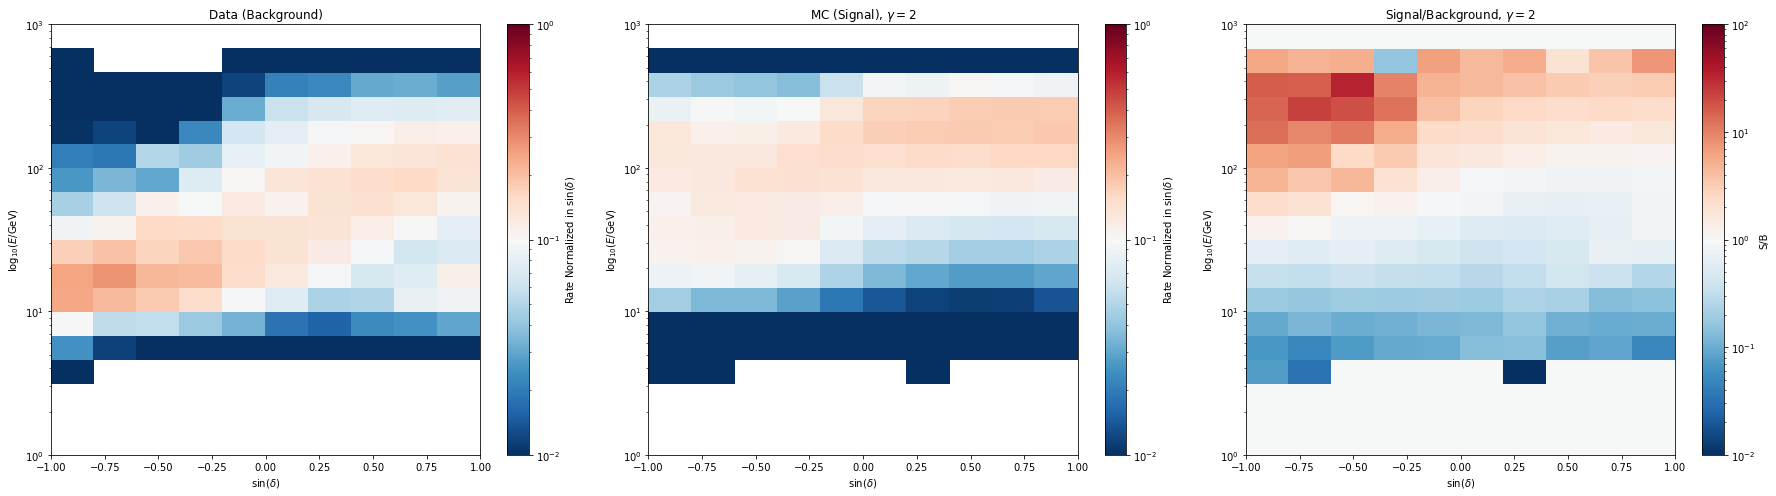

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(25,7))
axs = np.ravel(axs)

bins = [np.linspace(-1.,1.,10+1), np.logspace(0,3,18+1)]

h2d_bg = hl.hist((np.sin(data['dec']), data['energy']), bins = bins)
h2d_bg_T = h2d_bg.values.transpose()
h2d_bg._values = (h2d_bg_T/np.sum(h2d_bg_T, axis = 0)).transpose()

things = hl.plot2d(axs[0], h2d_bg,
                   vmin=1e-2, vmax=1e0, log=True, cbar=True, cmap='RdBu_r')

axs[0].set_title(r'Data (Background)')
things['colorbar'].set_label(r'Rate Normalized in $\sin(\delta)$')
axs[0].set_xlabel(r'$\sin(\delta)$')
axs[0].set_ylabel(r'$\log_{10}(E/\mathrm{GeV})$')


h2d_sig = hl.hist((np.sin(a.sig['dec']), a.sig['energy']), bins = bins,
              weights = a.sig['oneweight']*10**-8 * (a.sig['true_energy']**(-2)))
h2d_sig_T = h2d_sig.values.transpose()
h2d_sig._values = (h2d_sig_T/np.sum(h2d_sig_T, axis = 0)).transpose()
print(h2d_sig.values)

things = hl.plot2d(axs[1], h2d_sig,
                   vmin=1e-2, vmax=1e0, log=True, cbar=True, cmap='RdBu_r')

axs[1].set_title(r'MC (Signal), $\gamma = 2$')
things['colorbar'].set_label(r'Rate Normalized in $\sin(\delta)$')
axs[1].set_xlabel(r'$\sin(\delta)$')
axs[1].set_ylabel(r'$\log_{10}(E/\mathrm{GeV})$')

h2d_sob = hl.hist((np.sin(data['dec']), data['energy']), bins = bins)


bg_domain = h2d_bg.values > 0
sig_domain = h2d_sig.values > 0
h2d_bg._values[~bg_domain] = np.min(h2d_bg.values[bg_domain])
h2d_sig.values[~sig_domain] = h2d_bg.values[~sig_domain]

h2d_sob._values = h2d_sig.values/h2d_bg.values

things = hl.plot2d(axs[2], h2d_sob,
                   vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')

axs[2].set_title(r'Signal/Background, $\gamma = 2$')
things['colorbar'].set_label(r'S/B')
axs[2].set_xlabel(r'$\sin(\delta)$')
axs[2].set_ylabel(r'$\log_{10}(E/\mathrm{GeV})$')

plt.tight_layout()

## MCBG

In [29]:
ana = cy.get_analysis(cy.selections.Repository(), 'MCBG', cy.selections.QUESODataSpecs.QUESO, dir ='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/')
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 5
inj_conf =  {'bg_weight_names':['atmo_weight'],
                     'randomize'      :['ra', 'dec']}
b= ana[-1]

Setting up Analysis for:
QUESO
Setting up QUESO...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_MC_all_combined_with_muongun_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/Queso_Fakedata_3Years_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_fake_GRL_2.npy ...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20

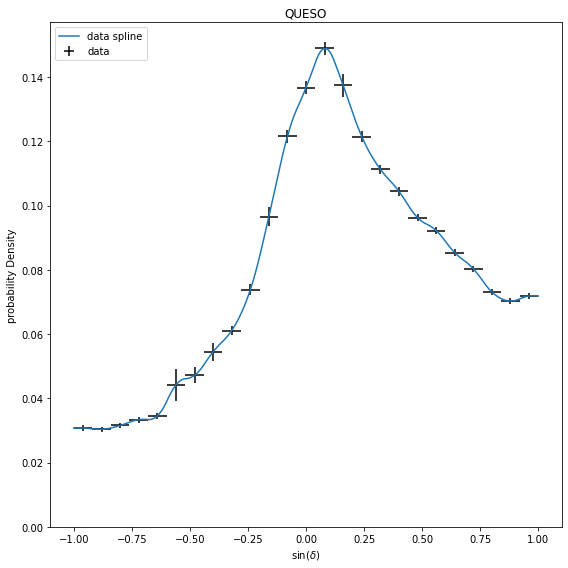

In [30]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = plt.gca()

hl.plot1d (ax, a.bg_space_param.h, crosses=True, color='k', label='data')

sd = np.linspace (-1, 1, 500)
plt.plot (sd, a.bg_space_param(sindec=sd), label='data spline')

plt.ylim(0)
plt.title('QUESO')
plt.xlabel(r'$\sin(\delta)$')
plt.ylabel(r'probability Density')
plt.legend(loc='upper left')
plt.tight_layout()

Setting up Analysis for:
QUESO
Setting up QUESO...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.0070

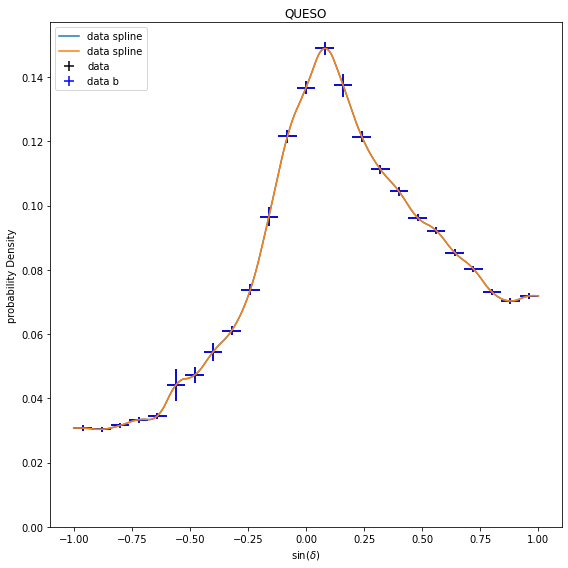

In [31]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = plt.gca()

hl.plot1d (ax, a.bg_space_param.h, crosses=True, color='k', label='data')
hl.plot1d (ax, b.bg_space_param.h, crosses=True, color='b', label='data b')

sd = np.linspace (-1, 1, 500)
plt.plot (sd, a.bg_space_param(sindec=sd), label='data spline')
plt.plot (sd, b.bg_space_param(sindec=sd), label='data spline')

plt.ylim(0)
plt.title('QUESO')
plt.xlabel(r'$\sin(\delta)$')
plt.ylabel(r'probability Density')
plt.legend(loc='upper left')
plt.tight_layout()

In [4]:
ana = cy.get_analysis(cy.selections.repo, 'ScrambleDecRa', cy.selections.QUESODataSpecs.QUESO, dir='/home/bschlueter/csky_queso_greco/QUESO/sigmacut10/', space_bg_kw={'bg_mc_weight':'atmo_weight'}, energy_kw ={'bg_mc_weight':'atmo_weight'}, load_sig = True)
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 5
        
inj_conf = {'randomize': ['ra', cy.inj.DecRandomizer],
                    'sindec_bandwidth': np.radians(5),
                    'dec_rand_method': 'gaussian_fixed',
                    'dec_rand_kwargs': dict(randomization_width=np.radians(3)),
                    'dec_rand_pole_exlusion': np.radians(8)}



Setting up Analysis for:
QUESO
Setting up QUESO...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_MC_all_combined_with_muongun_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/Queso_Fakedata_3Years_2.npy ...
Reading /data/user/bschlueter/software/nusources_dataset_converters/data/QUESO_fake_GRL_2.npy ...
Reduced events from 1214621 to 221243 with sigma <= 10.0
Reduced events from 673315 to 72049 with sigma <= 10.0
Constructing bins with 20113 counts per bin
Constructing bins with 20113 counts per bin
sindec bins [-0.9999696  -0.6481932  -0.32606843 -0.08024673  0.09930454  0.25343856
  0.39333096  0.52310336  0.6453574   0.76479137  0.8850748   0.9999975 ]
loge bins: [0.5086004 1.219319  1.3421243 1.4449694 1.543838  1.6518055 1.7688087
 1.8844036 2.007064  2.1456196 2.3122199 2.8144948]
Reduced events from 221243 to 221243 with sigma <= 10.0
Reduced events from 72049 to 72049 with sigma <= 10.0
Constructing bins with 20

In [5]:
cy.CONF

{'mp_cpus': 5, 'ana': Analysis(keys=[QUESO])}

In [7]:
tr = cy.get_trial_runner(src=cy.sources(180, 0, deg=True),inj_conf = inj_conf)

energy fit
I'm here at the Point Source Space PDF Ratio Model
energy model <csky.pdf.EnergyPDFRatioModel object at 0x7f64e39a7240>
Model in conf: [<csky.pdf.PointSourceSpacePDFRatioModel object at 0x7f64e3a55d30>, <csky.pdf.EnergyPDFRatioModel object at 0x7f64e39a7240>]
Model in conf1: [<csky.pdf.PointSourceSpacePDFRatioModel object at 0x7f64e3a55d30>, <csky.pdf.EnergyPDFRatioModel object at 0x7f64e39a7240>]
